# Math 210 Project 2: GDP Distribution and GDP Growth Rate

## Introduce the data 

1. My subject is going to analysis about economy and growth in GDP.

2. I choose this project is due to my second major in UBC which is Economy.
  I have been learned lots of lectures about economy, 
  and I want to combine my mathematics and economy knowledage together in my project2. 
  Therefore, I choose economy dataset and use the math210 method to analysis it.
  
3. I find this dataset as following website
http://data.worldbank.org/data-catalog/GDP-ranking-table

4. the reader can find all the information about GDP ranking in this website. Just open the web, and download all the documents they need. 

## Ask qustions

In this project, I have 2 types of quesions that I wold like to explore
1. what can we see from the GDP financial amout about this dataset? 
2. How are high GDP countries distributed over different continents?
    * What is the highest GDP country for each continent?
    * Which continent has the most top 50 GDP countries?
3. What might influence the GDP growth rate?
    * Is it related to birth rate, data rate, or GDP in that country?
    * Which factor above is most relevant to GDP growth rate? How does it influence the GDP growth rate?

Firstly, I need to introduce the definition of GDP 

*"Gross domestic product (GDP)*: 

**the monetary value of all the finished goods and services produced within a country's borders in a specific time period. Though GDP is usually calculated on an annual basis, it can be calculated on a quarterly basis as well. GDP includes all private and public consumption, government outlays, investments and exports minus imports that occur within a defined territory. Put simply, GDP is a broad measurement of a nation’s overall economic activity."**

Gross domestic product can be calculated using the following formula:

$$ GDP = C + G + I + NX $$

where C is equal to all private consumption, or consumer spending, in a nation's economy, G is the sum of government spending, I is the sum of all the country's investment, including businesses capital expenditures and NX is the nation's total net exports, calculated as total exports minus total imports (NX = Exports - Imports).

resource from online, the website is 
http://www.investopedia.com/terms/g/gdp.asp

Then, I am starting to analysis the dataset I get from 
*World Bank http://data.worldbank.org*


## Quick summary from datasat  

1. What can we see from GDP? This is a more economy question I thought. 
  In the economy world, there are two parts: *The pitfalls of GDP*, *Revisions*
  In another words, it means health and wealth somehow. why does it happen?  
  Usually, when we don not have much information about GDP, we choose to test a country health and wealth to account in instead of GDP 
 
 ** this part is more economy , if you are interested in, you can reader a quick summary online by following link:
 http://www.telegraph.co.uk/finance/economics/11159277/What-does-GDP-really-tell-us-about-economic-growth.html
 
2. Basicly, I thought it is kind of regionalism. 
   From top 10 we can see ,
   3 Asian countries : China & Japan & India, and the ranking is 2 &3 & 9 
   1 North America country: USA, and the ranking is 1 
   rest counties are located in Europe.
   
  As a result, 60% high GDP countries are from Europe
  
  (By the way , Canada is ranked by 11) 
 
3. I checked some notes from google and baidu. I don not think that GDP means everything about good quality of life. 
  For example, GDP ranking of China is higher than Canada. However, canadian medical treatment cause is much better than China even most of     Aisn countis such as India  
   



## Explore the dataset 

### Get High GDP countries' distribution

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

We first read the World Bank Open Data for GDP Ranking in year 2014:

In [2]:
gdpRank = pd.read_csv("GDPRanking.csv", encoding="latin", index_col=0)

In [3]:
print(gdpRank.head())

                Country Code       GDP
Ranking                               
1         United States  USA  17419000
2                 China  CHN  10354832
3                 Japan  JPN   4601461
4               Germany  DEU   3868291
5        United Kingdom  GBR   2988893


In [4]:
print(gdpRank.tail())

                       Country Code  GDP
Ranking                                 
191      Micronesia, Fed. Sts.  FSM  318
192                      Palau  PLW  251
193           Marshall Islands  MHL  187
194                   Kiribati  KIR  167
195                     Tuvalu  TUV   38


In [5]:
print(gdpRank.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 1 to 195
Data columns (total 3 columns):
Country    195 non-null object
Code       195 non-null object
GDP        195 non-null int64
dtypes: int64(1), object(2)
memory usage: 6.1+ KB
None


Then read the dataset that maps a country or district to its continent:

In [6]:
continent = pd.read_csv("Countries_Continents.csv", index_col=0)

In [7]:
print(continent.head())

         Continent
Country           
Algeria     Africa
Angola      Africa
Benin       Africa
Botswana    Africa
Burkina     Africa


Combine the GDP ranking dataset with the continent information, and then pick the top 50 high ranking GDP countries:

In [8]:
gdpRank_continent = gdpRank.join(continent, on='Country').head(50)

In [9]:
print(gdpRank_continent)

                      Country Code       GDP      Continent
Ranking                                                    
1               United States  USA  17419000  North America
2                       China  CHN  10354832           Asia
3                       Japan  JPN   4601461           Asia
4                     Germany  DEU   3868291         Europe
5              United Kingdom  GBR   2988893         Europe
6                      France  FRA   2829192         Europe
7                      Brazil  BRA   2416636  South America
8                       Italy  ITA   2141161         Europe
9                       India  IND   2048517           Asia
10         Russian Federation  RUS   1860598           Asia
11                     Canada  CAN   1785387  North America
12                  Australia  AUS   1454675        Oceania
13                Korea, Rep.  KOR   1410383           Asia
14                      Spain  ESP   1381342         Europe
15                     Mexico  MEX   129

Group those top 50 countries by continent:

In [10]:
gdpRank_grouped = gdpRank_continent.groupby('Continent')

See the highest GDP country for each continent:

In [11]:
print(gdpRank_grouped.head(1))

               Country Code       GDP      Continent
Ranking                                             
1        United States  USA  17419000  North America
2                China  CHN  10354832           Asia
4              Germany  DEU   3868291         Europe
7               Brazil  BRA   2416636  South America
12           Australia  AUS   1454675        Oceania
22             Nigeria  NGA    568508         Africa


Count the number of top50 GDP countries for each continent:

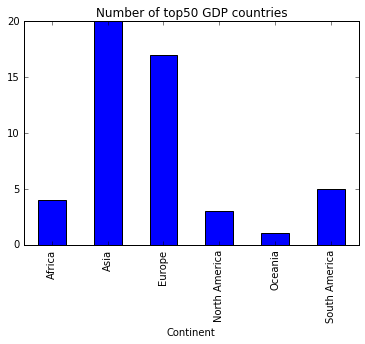

In [12]:
gdpRank_grouped['Country'].count().plot(kind='bar', title='Number of top50 GDP countries')

Compute the total GDP for each continent within the top 50 GDP countries:

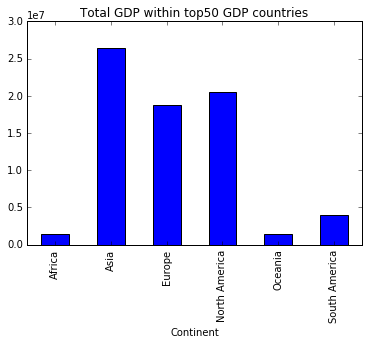

In [13]:
gdpRank_grouped['GDP'].sum().plot(kind='bar', title='Total GDP within top50 GDP countries')

### What influence GDP Growth?
We first read the data for birth rate, death rate, and GDP growth rate in year 2014:

In [14]:
gdpGrowth = pd.read_csv("GDPGrowth.csv", encoding="latin", index_col=0)
print(gdpGrowth.head())

               GDP_Growth
Country                  
Afghanistan           1.3
Albania               2.2
Algeria               3.8
American Samoa         ..
Andorra                ..


In [15]:
birthrate = pd.read_csv("Birthrate.csv", encoding="latin", index_col=0)
print(birthrate.head())

               Birth_Rate
Country                  
Afghanistan          34.2
Albania              13.4
Algeria              24.3
American Samoa         ..
Andorra                ..


In [16]:
deathrate = pd.read_csv("Deathrate.csv", encoding="latin", index_col=0)
print(deathrate.head())

               Death_Rate
Country                  
Afghanistan           8.2
Albania               7.4
Algeria               5.1
American Samoa         ..
Andorra                ..


We then combine different data into one table, convert all cells to numeric type, and drop the countries that have empty values:

In [17]:
combined = gdpGrowth.join([birthrate,deathrate,gdpRank[['Country','GDP']].set_index('Country')])
combined = combined.apply(pd.to_numeric, errors='coerce')
combined = combined.dropna()
print(combined.head())

                     GDP_Growth  Birth_Rate  Death_Rate       GDP
Country                                                          
Afghanistan                 1.3        34.2         8.2   20038.0
Albania                     2.2        13.4         7.4   13212.0
Algeria                     3.8        24.3         5.1  213518.0
Antigua and Barbuda         4.8        16.3         6.1    1221.0
Argentina                   0.5        17.5         7.6  537660.0


See the correlation between all these factors:

In [18]:
gdp_corr = combined.corr()
print(gdp_corr)

            GDP_Growth  Birth_Rate  Death_Rate       GDP
GDP_Growth    1.000000    0.320214   -0.031863 -0.024811
Birth_Rate    0.320214    1.000000    0.073016 -0.212722
Death_Rate   -0.031863    0.073016    1.000000  0.014287
GDP          -0.024811   -0.212722    0.014287  1.000000


From this table we can see that GDP growth rate is most relevant to birth rate among the three factors, and it doesn't have strong correlation with the death rate or GDP.

To see how GDP growth rate changes with birth rate:

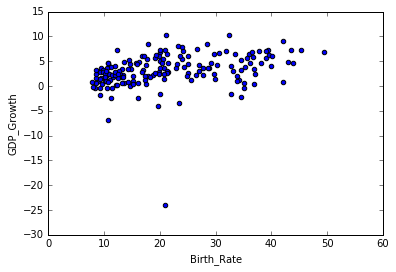

In [19]:
combined[['Birth_Rate','GDP_Growth']].plot(x='Birth_Rate',y='GDP_Growth',kind='scatter')

## All the finding 
firstly, I need to provide all the resource that I get from online as following :

I find this dataset as following website http://data.worldbank.org/data-catalog/GDP-ranking-table
 dataset I get from World Bank http://data.worldbank.org
 GDP resource from online, the website is http://www.investopedia.com/terms/g/gdp.asp
 this part is more economy , if you are interested in, you can reader a quick summary online by following link: http://www.telegraph.co.uk/finance/economics/11159277/What-does-GDP-really-tell-us-about-economic-growth.html
 
seconedly, I would like to summary this project

From economy part, we can see that GDP effects lots of aspects such as health, wealth ,and income 
From datasat we analysis, we can see it is kind of regionalism as we list above

For the top 50 GDP countries for each continent, we can see Asia and Europe has the most countries. While talking about the total GDP, though North America has only 3 countries in the list, its total GDP is still very high and similar to that of Asia and Europe.

For the factors that may influence GDP growth rate, we see that birth rate has the highest correlation with GDP growth rate, while other factors seem not very relevant.
